# **Project: Analyze 1994 and 1995 U.S. Census data for marketing purposes**

## **Our Goal:**


*   We use the 40 different variables to identifying people who earn an income of less than \$50,000 and people who earn more than $50,000.
*   Create the segmentation model to group the people represented in this dataset for marketing purposes.


## **Some column descriptions of the initial data set:**


*  detailed industry recode: converting an industry into its numerical code
*   detailed occupation recode: converting an occupation into its numerical code
*   weight: number of people or households that each survey respondent represents in the overall population
* migration code-change in msa: the movement of people between Metropolitan Statistical Areas
*  migration code-move with reg: the movement of people between different census regions
* migration prev res in sunbelt: people who moved from the Sunbelt region(the southern and southwestern U.S. states)
* Other columns are self-explanatory

In [1]:
from google.colab import files
uploaded = files.upload()  # pick your ZIP file
zip_name = list(uploaded.keys())[0]

# Unzip into a folder called 'extracted'
!unzip -o "$zip_name" -d extracted

# See what's inside
!ls -R extracted


Saving TakeHomeProject_new.zip to TakeHomeProject_new.zip
Archive:  TakeHomeProject_new.zip
  inflating: extracted/census-bureau.columns  
  inflating: extracted/census-bureau.data  
  inflating: extracted/MLProject_new.pdf  
extracted:
census-bureau.columns  census-bureau.data  MLProject_new.pdf


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

path = "extracted/census-bureau.data"
df = pd.read_csv(path, sep=None, engine="python")  # auto-detects delimiter
print(df.shape)

(199522, 42)


In [3]:
cols = pd.read_csv("extracted/census-bureau.columns", header=None)
df.columns = cols[0].tolist()
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [4]:
df.head(15)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,162.61,?,?,?,Not in universe under 1 year old,?,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
5,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,5178,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,1535.86,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
6,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,Job loser - on layoff,Unemploye

From the above first 15 rows we can see some data have "?" Also since that data is almost half. Let's replace it by "UNKNOWN" as a category.

In [5]:
import numpy as np
#replace the ? as "UNKNOWN"
df.replace('?', 'UNKNOWN', inplace = True)


Now check any missing data

In [6]:
missing_value_count = df.isnull().sum()
missing_value_count[0 : 41]


,0
age,0
class of worker,0
detailed industry recode,0
detailed occupation recode,0
education,0
wage per hour,0
enroll in edu inst last wk,0
marital stat,0
major industry code,0
major occupation code,0


In [7]:
#fill the hisponic region NA as "UNKNOWN"
df['hispanic origin'].fillna('UNKNOWN', inplace=True)

/tmp/ipython-input-73912244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hispanic origin'].fillna('UNKNOWN', inplace=True)


In [8]:
missing_value_count = df.isnull().sum()
missing_value_count[0 : 41]

,0
age,0
class of worker,0
detailed industry recode,0
detailed occupation recode,0
education,0
wage per hour,0
enroll in edu inst last wk,0
marital stat,0
major industry code,0
major occupation code,0


**Now add a column called "Income" as income > 50K then income is 1 and income <= 50K income is 0**

In [9]:
conditions = [
    (df['label'] == '- 50000.'),
    (df['label'] == '50000+.')
]

values = [0, 1]
df['Income'] = np.select(conditions, values)

**List unique values for each columns**

In [10]:
print(df.columns.tolist())
curKeys = df.columns.tolist()
for i in curKeys:
  print(i)
  print(df[i].unique())

['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', "fill inc questionnaire for veteran's admin", 'veterans benefits', 'weeks worked 

## Exploratory Data Analysis

 People Income > 50K or <= 50K in the data set

Income
0    187140
1     12382
Name: count, dtype: int64


<Axes: ylabel='count'>

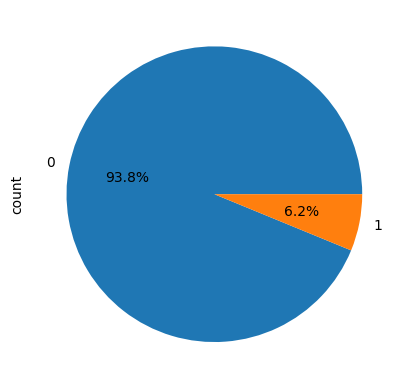

In [11]:
print(df['Income'].value_counts())
df['Income'].value_counts().plot.pie(autopct='%1.1f%%')

# The relationship between sex, educational level and age with income

/tmp/ipython-input-295577609.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Income', y='age', ax=axes[1,1], palette=['#ff9999', '#66b3ff'])


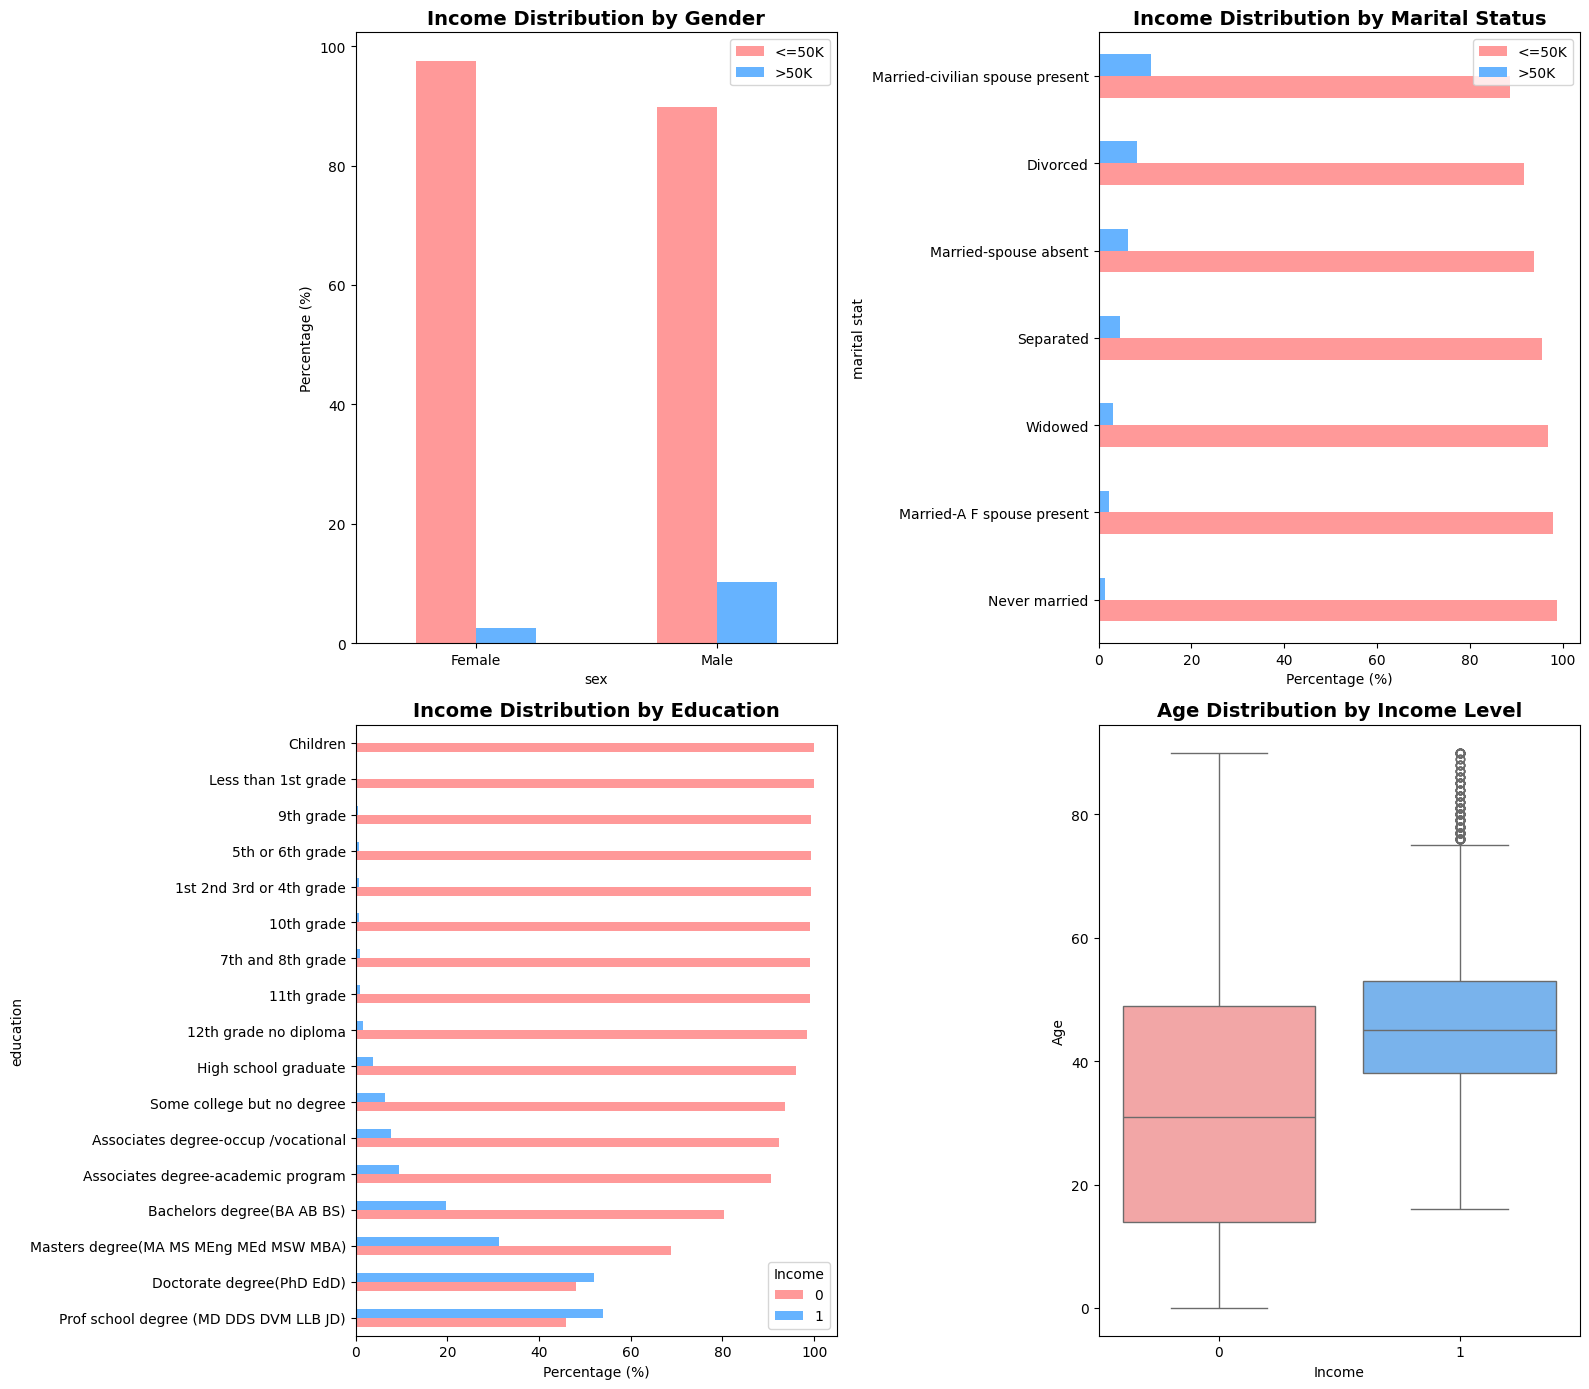

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Gender and Income
gender_income = pd.crosstab(df['sex'], df['Income'], normalize='index') * 100
gender_income.plot(kind='bar', ax=axes[0,0], color=['#ff9999', '#66b3ff'])
axes[0,0].set_title('Income Distribution by Gender', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Percentage (%)')
axes[0,0].legend(['<=50K', '>50K'])
axes[0,0].tick_params(axis='x', rotation=0)

# Marital Status and Income
marital_income = pd.crosstab(df['marital stat'], df['Income'], normalize='index') * 100
marital_income_sorted = marital_income.loc[marital_income[1].sort_values(ascending=True).index]
marital_income_sorted.plot(kind='barh', ax=axes[0,1], color=['#ff9999', '#66b3ff'])
axes[0,1].set_title('Income Distribution by Marital Status', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Percentage (%)')
axes[0,1].legend(['<=50K', '>50K'])

# Education and Income
edu_income = pd.crosstab(df['education'], df['Income'], normalize='index') * 100
edu_income_sorted = edu_income.loc[edu_income[1].sort_values(ascending=False).index]
edu_income_sorted.plot(kind='barh', ax=axes[1,0], color=['#ff9999', '#66b3ff'])
axes[1,0].set_title('Income Distribution by Education', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Percentage (%)')

# Age and Income
sns.boxplot(data=df, x='Income', y='age', ax=axes[1,1], palette=['#ff9999', '#66b3ff'])
axes[1,1].set_title('Age Distribution by Income Level', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Income')
axes[1,1].set_ylabel('Age')

plt.tight_layout()
plt.show()

# More precise data between age and income
Summary:

50% of people earning <=50K are between 14 and 49 years old

50% of people earning > 50K are between 38 and 53 years old

In [13]:
# Age distribution for people earning <=50K
low_income_ages = df[df['Income'] == 0]['age']

# Get the 25th and 75th percentiles (middle 50%)
q25 = low_income_ages.quantile(0.25)
q75 = low_income_ages.quantile(0.75)

print(f"50% of people earning <=50K are between {q25:.0f} and {q75:.0f} years old")
print(f"25th percentile: {q25:.0f} years")
print(f"75th percentile: {q75:.0f} years")
print('precise median age for <=50K income : ',df[df['Income']== 0]['age'].median(), 'yrs')


50% of people earning <=50K are between 14 and 49 years old
25th percentile: 14 years
75th percentile: 49 years
precise median age for <=50K income :  31.0 yrs


In [21]:
# Age distribution for people earning >50K
low_income_ages = df[df['Income'] == 1]['age']

# Get the 25th and 75th percentiles (middle 50%)
q25 = low_income_ages.quantile(0.25)
q75 = low_income_ages.quantile(0.75)

print(f"50% of people earning > 50K are between {q25:.0f} and {q75:.0f} years old")
print(f"25th percentile: {q25:.0f} years")
print(f"75th percentile: {q75:.0f} years")
print('precise median age for >50K income : ',df[df['Income']== 1]['age'].median(), 'yrs')

50% of people earning > 50K are between 38 and 53 years old
25th percentile: 38 years
75th percentile: 53 years
precise median age for >50K income :  45.0 yrs


**Surprisingly, in the relationship between marital status and income, divorce ranks #2 among income > 50k.**

# Some additional relationships graphed with respect to income.

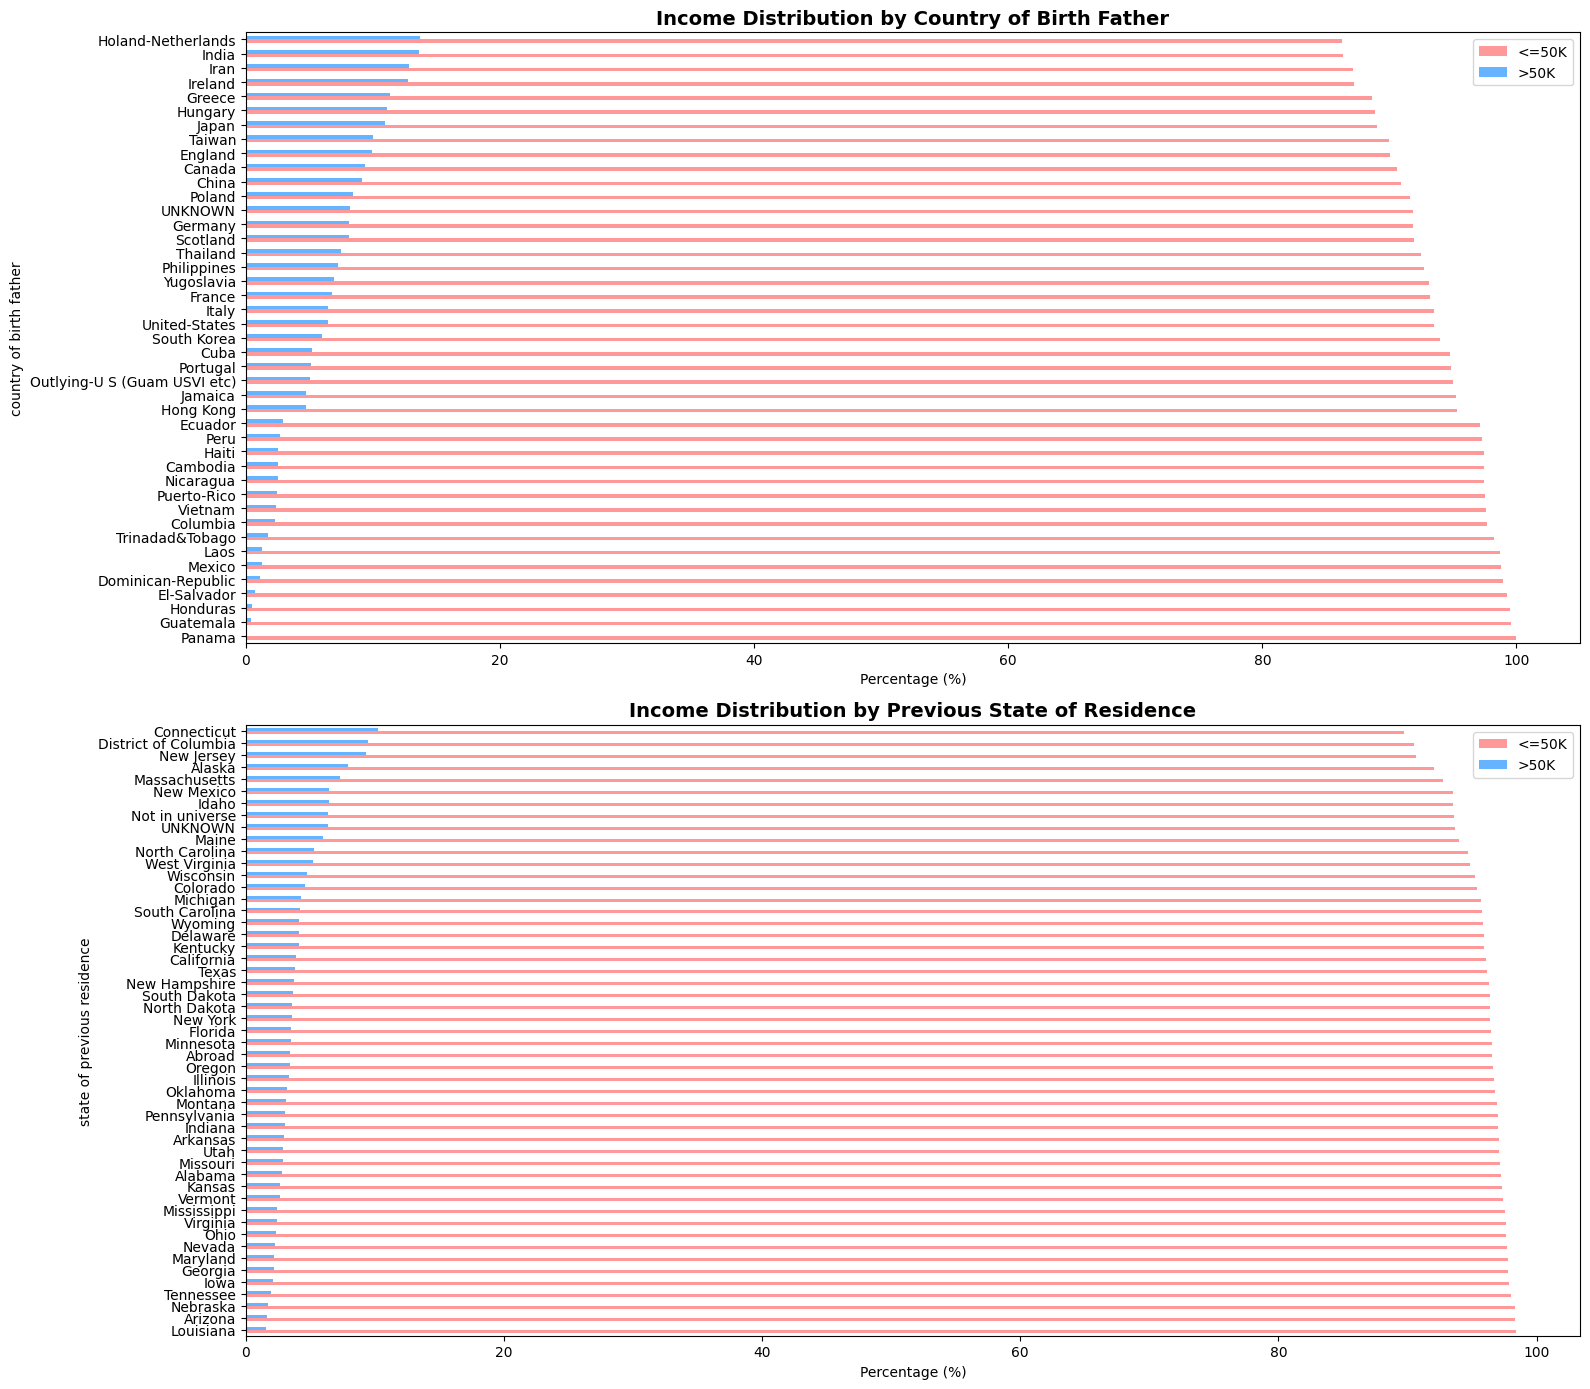

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('default')
fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# Father origin
origin_income = pd.crosstab(df['country of birth father'], df['Income'], normalize='index') * 100
origin_income_sorted = origin_income.loc[origin_income[1].sort_values(ascending=True).index]
origin_income_sorted.plot(kind='barh', ax=axes[0], color=['#ff9999', '#66b3ff'])
axes[0].set_title('Income Distribution by Country of Birth Father', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Percentage (%)')
axes[0].legend(['<=50K', '>50K'])

# State of Previous Residence
res_income = pd.crosstab(df['state of previous residence'], df['Income'], normalize='index') * 100
res_income_sorted = res_income.loc[res_income[1].sort_values(ascending=True).index]
res_income_sorted.plot(kind='barh', ax=axes[1], color=['#ff9999', '#66b3ff'])
axes[1].set_title('Income Distribution by Previous State of Residence', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Percentage (%)')
axes[1].legend(['<=50K', '>50K'])

plt.tight_layout()
plt.show()

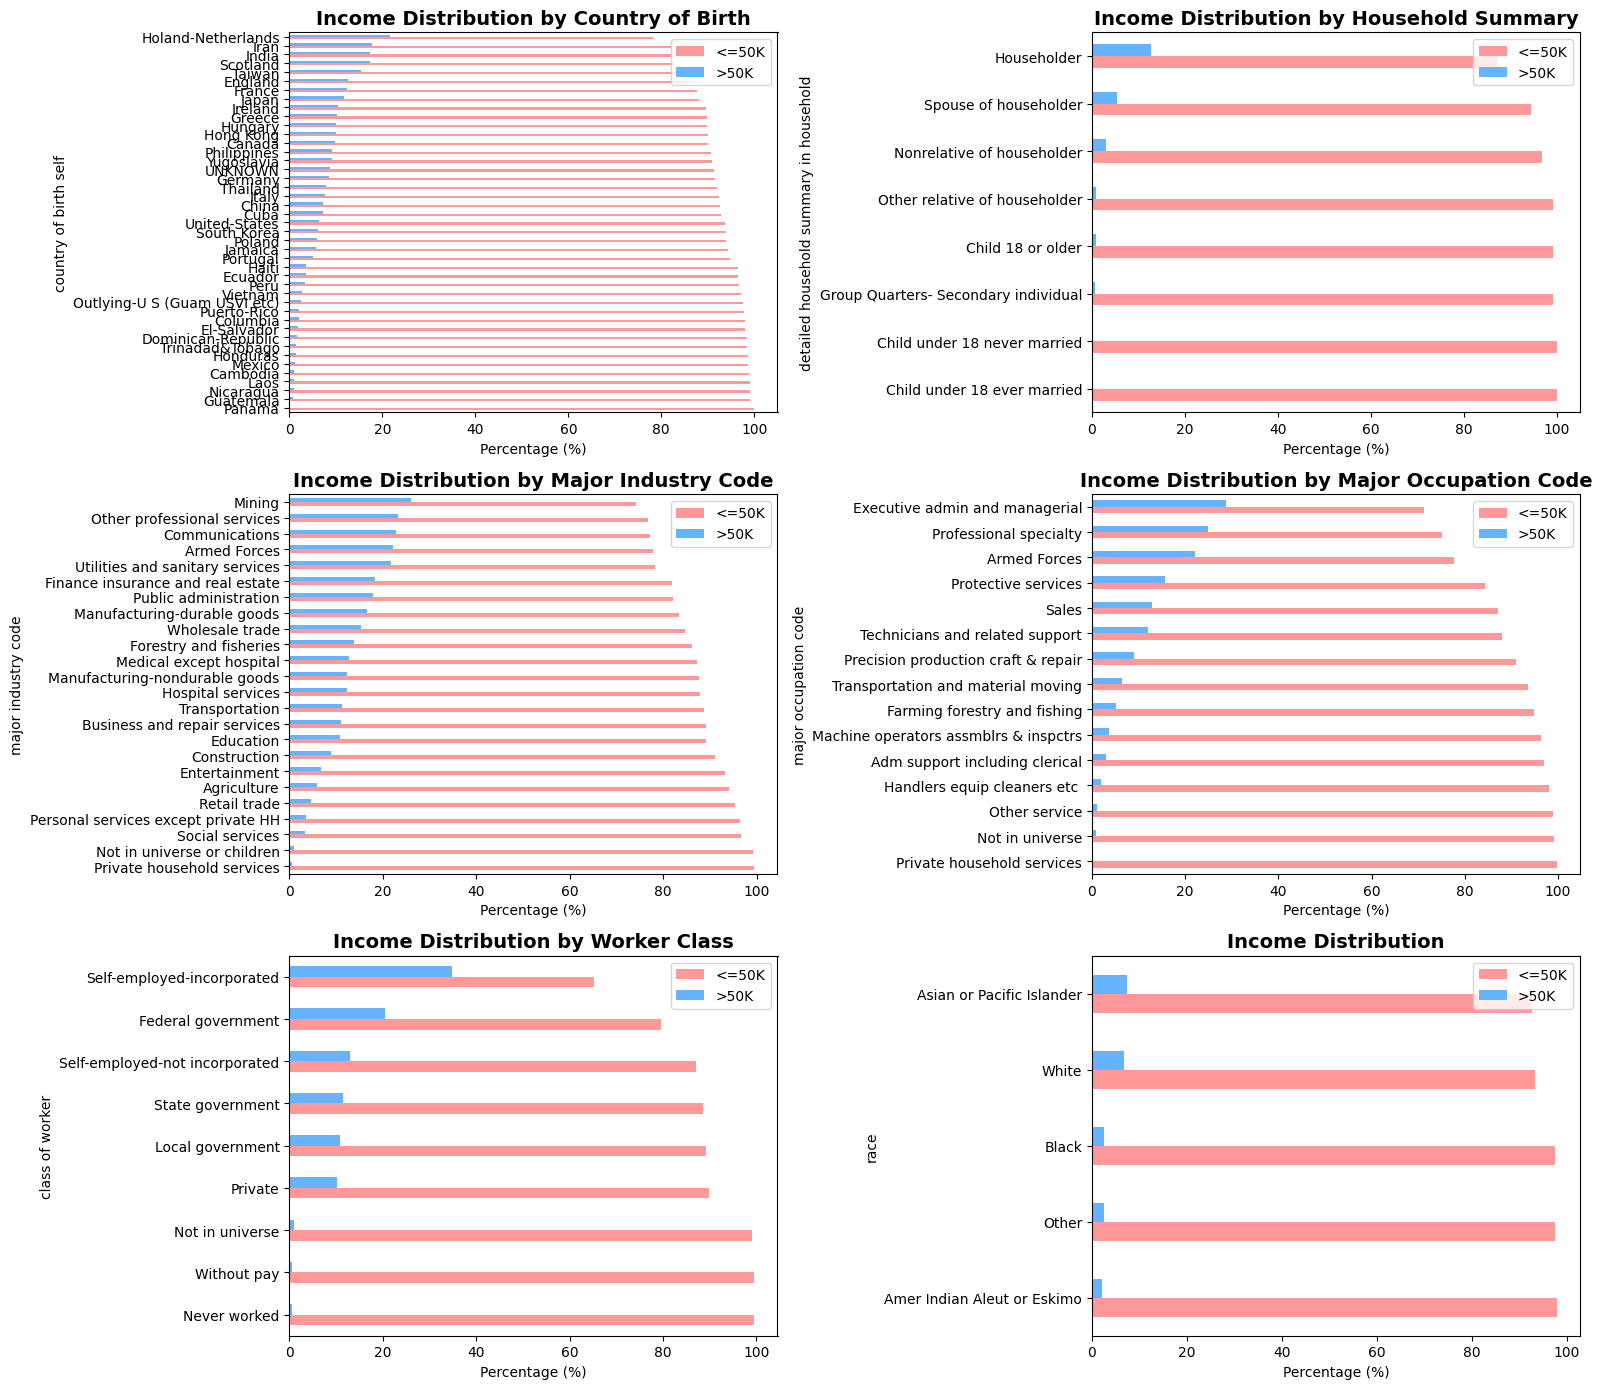

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('default')
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# Origin and Income
origin_income = pd.crosstab(df['country of birth self'], df['Income'], normalize='index') * 100
origin_income_sorted = origin_income.loc[origin_income[1].sort_values(ascending=True).index]
origin_income_sorted.plot(kind='barh', ax=axes[0,0], color=['#ff9999', '#66b3ff'])
axes[0,0].set_title('Income Distribution by Country of Birth', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Percentage (%)')
axes[0,0].legend(['<=50K', '>50K'])

# detailed household summary in household
res_income = pd.crosstab(df['detailed household summary in household'], df['Income'], normalize='index') * 100
res_income_sorted = res_income.loc[res_income[1].sort_values(ascending=True).index]
res_income_sorted.plot(kind='barh', ax=axes[0,1], color=['#ff9999', '#66b3ff'])
axes[0,1].set_title('Income Distribution by Household Summary', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Percentage (%)')
axes[0,1].legend(['<=50K', '>50K'])

# Major industry Code
indust_income = pd.crosstab(df['major industry code'], df['Income'], normalize='index') * 100
indust_income_sorted = indust_income.loc[indust_income[1].sort_values(ascending=True).index]
indust_income_sorted.plot(kind='barh', ax=axes[1,0], color=['#ff9999', '#66b3ff'])
axes[1,0].set_title('Income Distribution by Major Industry Code', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Percentage (%)')
axes[1,0].legend(['<=50K', '>50K'])

# Major occupation code
occ_income = pd.crosstab(df['major occupation code'], df['Income'], normalize='index') * 100
occ_income_sorted = occ_income.loc[occ_income[1].sort_values(ascending=True).index]
occ_income_sorted.plot(kind='barh', ax=axes[1,1], color=['#ff9999', '#66b3ff'])
axes[1,1].set_title('Income Distribution by Major Occupation Code', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Percentage (%)')
axes[1,1].legend(['<=50K', '>50K'])

# Class of Worker
occ_class = pd.crosstab(df['class of worker'], df['Income'], normalize='index') * 100
occ_class_sorted = occ_class.loc[occ_class[1].sort_values(ascending=True).index]
occ_class_sorted.plot(kind='barh', ax=axes[2,0], color=['#ff9999', '#66b3ff'])
axes[2,0].set_title('Income Distribution by Worker Class', fontsize=14, fontweight='bold')
axes[2,0].set_xlabel('Percentage (%)')
axes[2,0].legend(['<=50K', '>50K'])

# Race
race_income = pd.crosstab(df['race'], df['Income'], normalize='index') * 100
race_income_sorted = race_income.loc[race_income[1].sort_values(ascending=True).index]
race_income_sorted.plot(kind='barh', ax=axes[2,1], color=['#ff9999', '#66b3ff'])
axes[2,1].set_title('Income Distribution', fontsize=14, fontweight='bold')
axes[2,1].set_xlabel('Percentage (%)')
axes[2,1].legend(['<=50K', '>50K'])

plt.tight_layout()
plt.show()

# Problem 1:

By the age distribution we noticed that the data set includes a lot of children. Checking the people whose age < 18 we found that for almost all of them the income is 0 with only 2 outliers. Based on how unbalanced this is, we dropped the people age less than 18 from our data.

In [17]:
df['age'].unique()
#want to check the Income column for age <18
df[df['age'] < 18]['Income'].value_counts()

,count
Income,
0,55990
1,2


Here we will start to organize the data, breaking up the data into numerical and categorical data

redefine numericKeys and categoricalKeys to account for categorical data that has been encoded numerically specifically we are moving 'detailed industry recode', 'detailed occupation recode', 'own business or self employed', 'veterans benefits', 'year' to categorical data

this is a prelimary assortment, we will preprocess the data more, especially some data that could be considered well ordered such as educational attainment could be later reclassified as numeric


may also consider converting age to categorical and group certain ages.

these are what we will train on and take as input so we will also remove income and label, and also need to remove weight

In [18]:

numericKeys = ['age', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'num persons worked for employer',  'weeks worked in year']
categoricalKeys = ['detailed industry recode', 'detailed occupation recode', 'own business or self employed', 'veterans benefits', 'year', 'class of worker', 'education', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', "fill inc questionnaire for veteran's admin"]

In [19]:
#now consider drop all the rows which age are < 18 and retrain the model to check
df2 = df[df['age'] >= 18].copy()
weights = df2['weight']
df2[categoricalKeys] = df2[categoricalKeys].astype('category')

First Model

In [25]:
#Now that we have very naively sorted the data lets just make a base model using XG boost so as we process our data we have some control to compare to, in order to make sure our processing is actually beneficial at each step.
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix, balanced_accuracy_score, average_precision_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(df2[numericKeys + categoricalKeys], df2['Income'], df2['weight'], test_size=.2, stratify=df2['Income'])

# create model instance, we will train with an aucpr metric due to our data being unbalanced
v1Model = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=0.05, objective='binary:logistic', tree_method="hist", enable_categorical=True, eval_metric=["aucpr"])
# fit model
v1Model.fit(X_train, y_train, sample_weight=w_train)
# make predictions
preds = v1Model.predict(X_test)
proba = v1Model.predict_proba(X_test)[:,1]  # probabilities for the positive class
print("ROC AUC :", roc_auc_score(y_test, proba))
print("PR-AUC:", average_precision_score(y_test, proba))

ROC AUC : 0.8024734746744501
PR-AUC: 0.3903230085031537


In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix, balanced_accuracy_score

#These tests will be what we use to Evaluate the model
ths = np.linspace(0.01, 0.99, 99)
f1_scores = []
for thr in ths:
  preds = (proba >= thr).astype(int)
  f1_scores.append(f1_score(y_test, preds))

best_thr = ths[int(np.argmax(f1_scores))]
print(f"Best threshold by F1_score is: {best_thr}")

preds_with_best_thr = (proba >= best_thr).astype(int)

print("Accuracy:", accuracy_score(y_test, preds_with_best_thr))
print("F1-score:", f1_score(y_test, preds_with_best_thr))#
print("\nConfusion matrix:\n", confusion_matrix(y_test, preds_with_best_thr))
print("\nClassification report:\n", classification_report(y_test, preds_with_best_thr, digits=4))

ths = np.linspace(0.01, 0.99, 99)
acc_scores = []
for thr in ths:
  preds = (proba >= thr).astype(int)
  acc_scores.append(accuracy_score(y_test, preds))

best_thr = ths[int(np.argmax(acc_scores))]
print(f"Best threshold by Accuracy is: {best_thr}")

preds_with_best_thr = (proba >= best_thr).astype(int)

print("Accuracy:", accuracy_score(y_test, preds_with_best_thr))
print("F1-score:", f1_score(y_test, preds_with_best_thr))#
print("\nConfusion matrix:\n", confusion_matrix(y_test, preds_with_best_thr))
print("\nClassification report:\n", classification_report(y_test, preds_with_best_thr, digits=4))

ths = np.linspace(0.01, 0.99, 99)
acc_scores = []
for thr in ths:
  preds = (proba >= thr).astype(int)
  acc_scores.append(balanced_accuracy_score(y_test, preds))

best_thr = ths[int(np.argmax(acc_scores))]
print(f"Best threshold by Balanced Accuracy is: {best_thr}")


preds_with_best_thr = (proba >= best_thr).astype(int)



print("Accuracy:", accuracy_score(y_test, preds_with_best_thr))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, preds_with_best_thr))
print("F1-score:", f1_score(y_test, preds_with_best_thr))#
print("\nConfusion matrix:\n", confusion_matrix(y_test, preds_with_best_thr))
print("\nClassification report:\n", classification_report(y_test, preds_with_best_thr, digits=4))


Best threshold by F1_score is: 0.11
Accuracy: 0.9144778095171741
F1-score: 0.4730628890319811

Confusion matrix:
 [[25149  1081]
 [ 1374  1102]]

Classification report:
               precision    recall  f1-score   support

           0     0.9482    0.9588    0.9535     26230
           1     0.5048    0.4451    0.4731      2476

    accuracy                         0.9145     28706
   macro avg     0.7265    0.7019    0.7133     28706
weighted avg     0.9100    0.9145    0.9120     28706

Best threshold by Accuracy is: 0.12
Accuracy: 0.9222810562251794
F1-score: 0.21360592174832568

Confusion matrix:
 [[26172    58]
 [ 2173   303]]

Classification report:
               precision    recall  f1-score   support

           0     0.9233    0.9978    0.9591     26230
           1     0.8393    0.1224    0.2136      2476

    accuracy                         0.9223     28706
   macro avg     0.8813    0.5601    0.5864     28706
weighted avg     0.9161    0.9223    0.8948     28706

Best 

We will use the previous model as a baseline to compare our proceeding models.
The main things we will try is using K-fold cross-validation, and due to the imbalance in the training data, we will scale weights by the ratio at which low to high income occurs.

In order to make use of K-fold cross validation we will instead use xgboosts train function and build a dmatrix manually.

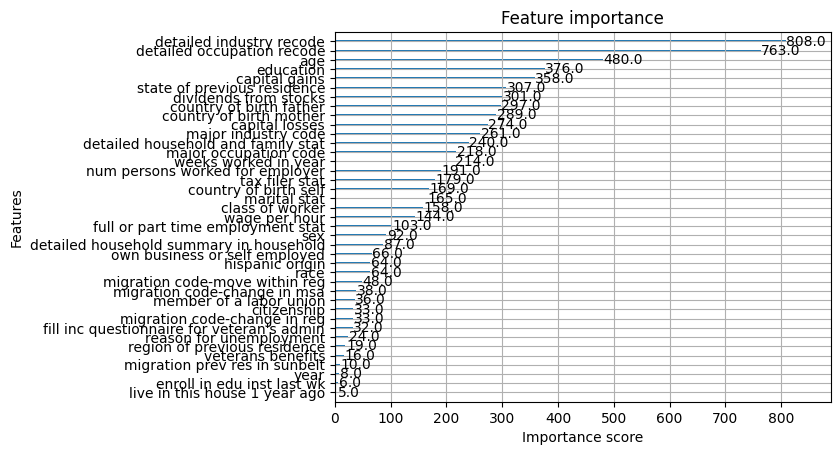

<Figure size 1600x1200 with 0 Axes>

Accuracy: 0.9330801922942938
ROC AUC : 0.9288165781513972
PR-AUC: 0.6593417509394968
F1-score: 0.602688728024819

Confusion matrix:
 [[25328   902]
 [ 1019  1457]]

Classification report:
               precision    recall  f1-score   support

           0     0.9613    0.9656    0.9635     26230
           1     0.6176    0.5884    0.6027      2476

    accuracy                         0.9331     28706
   macro avg     0.7895    0.7770    0.7831     28706
weighted avg     0.9317    0.9331    0.9323     28706



In [27]:

from xgboost import cv
import xgboost as xgb

df2[categoricalKeys] = df2[categoricalKeys].astype('category')
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(df2[numericKeys + categoricalKeys], df2['Income'], df2['weight'] ,test_size=.2, stratify=df2['Income'])

dmatrix = xgb.DMatrix(data=X_train, label=y_train, weight = w_train, enable_categorical=True)

ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
params = {"objective":"binary:logistic",'colsample_bytree': 0.4,'learning_rate': 0.1,
                'max_depth': 6, 'alpha':10, "scale_pos_weight": ratio, 'eval_metric':"aucpr"}

#running k-fold validation
xgb_cv = cv(dtrain=dmatrix, params=params, nfold=7, num_boost_round=3000, early_stopping_rounds=200, metrics="aucpr", as_pandas=True, seed=123312)
# create model instance

xgb_cv.head()

#pick the best round via k-fold
best_rounds = len(xgb_cv)

v2Model = xgb.train(params=params, dtrain=dmatrix, num_boost_round=best_rounds)

import matplotlib.pyplot as plt  # for plotting facilities
xgb.plot_importance(v2Model)
plt.figure(figsize = (16, 12))
plt.show()


# Convert X_test to DMatrix
dtest = xgb.DMatrix(data=X_test, enable_categorical=True)

proba = v2Model.predict(dtest)
thr = 0.8
preds = (proba > thr).astype(int)
print("Accuracy:", accuracy_score(y_test, preds))
print("ROC AUC :", roc_auc_score(y_test, proba))
print("PR-AUC:", average_precision_score(y_test, proba))
print("F1-score:", f1_score(y_test, preds))
print("\nConfusion matrix:\n", confusion_matrix(y_test, preds))
print("\nClassification report:\n", classification_report(y_test, preds, digits=4))

In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix, balanced_accuracy_score

#These tests will be what we use to Evaluate the model
ths = np.linspace(0.01, 0.99, 99)
f1_scores = []
for thr in ths:
  preds = (proba >= thr).astype(int)
  f1_scores.append(f1_score(y_test, preds))

best_thr = ths[int(np.argmax(f1_scores))]
print(f"Best threshold by F1_score is: {best_thr}")

preds_with_best_thr = (proba >= best_thr).astype(int)

print("Accuracy:", accuracy_score(y_test, preds_with_best_thr))
print("F1-score:", f1_score(y_test, preds_with_best_thr))#
print("\nConfusion matrix:\n", confusion_matrix(y_test, preds_with_best_thr))
print("\nClassification report:\n", classification_report(y_test, preds_with_best_thr, digits=4))

ths = np.linspace(0.01, 0.99, 99)
acc_scores = []
for thr in ths:
  preds = (proba >= thr).astype(int)
  acc_scores.append(accuracy_score(y_test, preds))

best_thr = ths[int(np.argmax(acc_scores))]
print(f"Best threshold by Accuracy is: {best_thr}")

preds_with_best_thr = (proba >= best_thr).astype(int)

print("Accuracy:", accuracy_score(y_test, preds_with_best_thr))
print("F1-score:", f1_score(y_test, preds_with_best_thr))#
print("\nConfusion matrix:\n", confusion_matrix(y_test, preds_with_best_thr))
print("\nClassification report:\n", classification_report(y_test, preds_with_best_thr, digits=4))

ths = np.linspace(0.01, 0.99, 99)
acc_scores = []
for thr in ths:
  preds = (proba >= thr).astype(int)
  acc_scores.append(balanced_accuracy_score(y_test, preds))

best_thr = ths[int(np.argmax(acc_scores))]
print(f"Best threshold by Balanced Accuracy is: {best_thr}")


preds_with_best_thr = (proba >= best_thr).astype(int)



print("Accuracy:", accuracy_score(y_test, preds_with_best_thr))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, preds_with_best_thr))
print("F1-score:", f1_score(y_test, preds_with_best_thr))#
print("\nConfusion matrix:\n", confusion_matrix(y_test, preds_with_best_thr))
print("\nClassification report:\n", classification_report(y_test, preds_with_best_thr, digits=4))


Best threshold by F1_score is: 0.79
Accuracy: 0.9320002786873824
F1-score: 0.6048582995951417

Confusion matrix:
 [[25260   970]
 [  982  1494]]

Classification report:
               precision    recall  f1-score   support

           0     0.9626    0.9630    0.9628     26230
           1     0.6063    0.6034    0.6049      2476

    accuracy                         0.9320     28706
   macro avg     0.7845    0.7832    0.7838     28706
weighted avg     0.9319    0.9320    0.9319     28706

Best threshold by Accuracy is: 0.87
Accuracy: 0.9390371350937087
F1-score: 0.5813397129186603

Confusion matrix:
 [[25741   489]
 [ 1261  1215]]

Classification report:
               precision    recall  f1-score   support

           0     0.9533    0.9814    0.9671     26230
           1     0.7130    0.4907    0.5813      2476

    accuracy                         0.9390     28706
   macro avg     0.8332    0.7360    0.7742     28706
weighted avg     0.9326    0.9390    0.9338     28706

Best t

Let's try cutting some unimportant features to see if this reduces noise and hopefully gives us some better results. We will also simplify the education and household categories. We considered downsampling, but worry that this is not realistic and the outcome would not generalize well to real-world data.

We also modified the model parameters to try to achieve a better result.


In [29]:
numericKeys2 = ['age', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'num persons worked for employer',  'weeks worked in year']
categoricalKeys2 = ['detailed industry recode', 'detailed occupation recode', 'own business or self employed', 'class of worker', 'education_simplified', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'full or part time employment stat', 'tax filer stat',  'state of previous residence', 'household_group', 'migration code-change in msa', 'family members under 18',  'country of birth father', 'country of birth mother', 'country of birth self']

In [30]:
map_edu = {
    'Children': 'Children',

    'Less than 1st grade': 'HighSchoolDropout',
    '1st 2nd 3rd or 4th grade': 'HighSchoolDropout',
    '5th or 6th grade': 'HighSchoolDropout',
    '7th and 8th grade': 'HighSchoolDropout',
    '9th grade': 'HighSchoolDropout',
    '10th grade': 'HighSchoolDropout',

    '11th grade': 'HighSchoolDropout',
    '12th grade no diploma': 'HighSchoolDropout',
    'High school graduate': 'HighSchoolGrad',

    'Some college but no degree': 'CollegeSome',
    'Associates degree-academic program': 'CollegeSome',
    'Associates degree-occup /vocational': 'Trades',

    'Bachelors degree(BA AB BS)': 'Bachelors',

    'Masters degree(MA MS MEng MEd MSW MBA)': 'Graduate',
    'Prof school degree (MD DDS DVM LLB JD)': 'professional Higher Graduate',
    'Doctorate degree(PhD EdD)': 'Higher Graduate'
}

df2['education_simplified'] = df2['education'].map(map_edu)

df2["education_simplified"] = df2["education_simplified"].astype('category')



In [31]:
def simplify_household_status(x):
    if "Householder" in x:
        return "Householder"
    elif "Spouse" in x:
        return "Spouse/Partner"
    elif "Child" in x:
        return "Child"
    elif "Grandchild" in x:
        return "Grandchild"
    elif "Other Rel" in x:
        return "Other relative"
    elif "Secondary" in x or "unrelated" in x:
        return "Unrelated individual"
    elif "group quarters" in x.lower():
        return "Group quarters"
    else:
        return "Other"

df2["household_group"] = df2["detailed household and family stat"].apply(simplify_household_status)


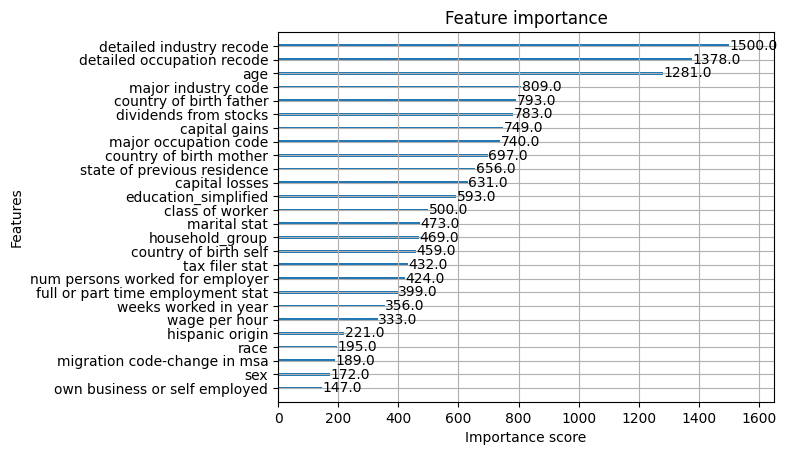

<Figure size 1600x1200 with 0 Axes>

Accuracy: 0.9369469797254929
ROC AUC : 0.9317691315854467
PR-AUC: 0.6751797154618591
F1-score: 0.6264960792406108

Confusion matrix:
 [[25378   852]
 [  958  1518]]

Classification report:
               precision    recall  f1-score   support

           0     0.9636    0.9675    0.9656     26230
           1     0.6405    0.6131    0.6265      2476

    accuracy                         0.9369     28706
   macro avg     0.8021    0.7903    0.7960     28706
weighted avg     0.9358    0.9369    0.9363     28706



In [40]:

from xgboost import cv
import xgboost as xgb

df2[categoricalKeys2] = df2[categoricalKeys2].astype('category')
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(df2[numericKeys2 + categoricalKeys2], df2['Income'], df2['weight'] ,test_size=.2, stratify=df2['Income'])

dmatrix = xgb.DMatrix(data=X_train, label=y_train, weight = w_train, enable_categorical=True)

ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
params = {"objective":"binary:logistic",'colsample_bytree': 0.4,'learning_rate': 0.1,
                'max_depth': 7, 'alpha':10, "scale_pos_weight": ratio, 'eval_metric':"aucpr"}

#running k-fold validation
xgb_cv = cv(dtrain=dmatrix, params=params, nfold=7, num_boost_round=3000, early_stopping_rounds=200, metrics="aucpr", as_pandas=True, seed=123312)
# create model instance

xgb_cv.head()

#pick the best round via k-fold
best_rounds = len(xgb_cv)

v3Model = xgb.train(params=params, dtrain=dmatrix, num_boost_round=best_rounds)

import matplotlib.pyplot as plt  # for plotting facilities
xgb.plot_importance(v3Model)
plt.figure(figsize = (16, 12))
plt.show()


# Convert X_test to DMatrix
dtest = xgb.DMatrix(data=X_test, enable_categorical=True)

proba = v3Model.predict(dtest)
thr = 0.8
preds = (proba > thr).astype(int)
print("Accuracy:", accuracy_score(y_test, preds))
print("ROC AUC :", roc_auc_score(y_test, proba))
print("PR-AUC:", average_precision_score(y_test, proba))
print("F1-score:", f1_score(y_test, preds))
print("\nConfusion matrix:\n", confusion_matrix(y_test, preds))
print("\nClassification report:\n", classification_report(y_test, preds, digits=4))

In [41]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix, balanced_accuracy_score, precision_score

#These tests will be what we use to Evaluate the model
ths = np.linspace(0.01, 0.99, 99)
f1_scores = []
for thr in ths:
  preds = (proba >= thr).astype(int)
  f1_scores.append(f1_score(y_test, preds))

best_thr = ths[int(np.argmax(f1_scores))]
print(f"Best threshold by F1_score is: {best_thr}")

preds_with_best_thr = (proba >= best_thr).astype(int)

print("Accuracy:", accuracy_score(y_test, preds_with_best_thr))
print("F1-score:", f1_score(y_test, preds_with_best_thr))#
print("\nConfusion matrix:\n", confusion_matrix(y_test, preds_with_best_thr))
print("\nClassification report:\n", classification_report(y_test, preds_with_best_thr, digits=4))

ths = np.linspace(0.01, 0.99, 99)
acc_scores = []
for thr in ths:
  preds = (proba >= thr).astype(int)
  acc_scores.append(accuracy_score(y_test, preds))

best_thr = ths[int(np.argmax(acc_scores))]
print(f"Best threshold by Accuracy is: {best_thr}")

preds_with_best_thr = (proba >= best_thr).astype(int)

print("Accuracy:", accuracy_score(y_test, preds_with_best_thr))
print("F1-score:", f1_score(y_test, preds_with_best_thr))#
print("\nConfusion matrix:\n", confusion_matrix(y_test, preds_with_best_thr))
print("\nClassification report:\n", classification_report(y_test, preds_with_best_thr, digits=4))

ths = np.linspace(0.01, 0.99, 99)
acc_scores = []
for thr in ths:
  preds = (proba >= thr).astype(int)
  acc_scores.append(balanced_accuracy_score(y_test, preds))

best_thr = ths[int(np.argmax(acc_scores))]
print(f"Best threshold by Balanced Accuracy is: {best_thr}")


preds_with_best_thr = (proba >= best_thr).astype(int)



print("Accuracy:", accuracy_score(y_test, preds_with_best_thr))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, preds_with_best_thr))
print("F1-score:", f1_score(y_test, preds_with_best_thr))#
print("\nConfusion matrix:\n", confusion_matrix(y_test, preds_with_best_thr))
print("\nClassification report:\n", classification_report(y_test, preds_with_best_thr, digits=4))






Best threshold by F1_score is: 0.78
Accuracy: 0.9346826447432592
F1-score: 0.6271624577450785

Confusion matrix:
 [[25254   976]
 [  899  1577]]

Classification report:
               precision    recall  f1-score   support

           0     0.9656    0.9628    0.9642     26230
           1     0.6177    0.6369    0.6272      2476

    accuracy                         0.9347     28706
   macro avg     0.7917    0.7999    0.7957     28706
weighted avg     0.9356    0.9347    0.9351     28706

Best threshold by Accuracy is: 0.88
Accuracy: 0.9401518846234237
F1-score: 0.5826044703595724

Confusion matrix:
 [[25789   441]
 [ 1277  1199]]

Classification report:
               precision    recall  f1-score   support

           0     0.9528    0.9832    0.9678     26230
           1     0.7311    0.4842    0.5826      2476

    accuracy                         0.9402     28706
   macro avg     0.8420    0.7337    0.7752     28706
weighted avg     0.9337    0.9402    0.9345     28706

Best t

One can see that cutting out these low importance score features, did not really help nor hurt the model. However, the fact that this performs comparably is useful for applications as it limits the number of characteristics we need to tracks to reasonably determine income.

Next we plot an ROC and Precision-Recall Curve.



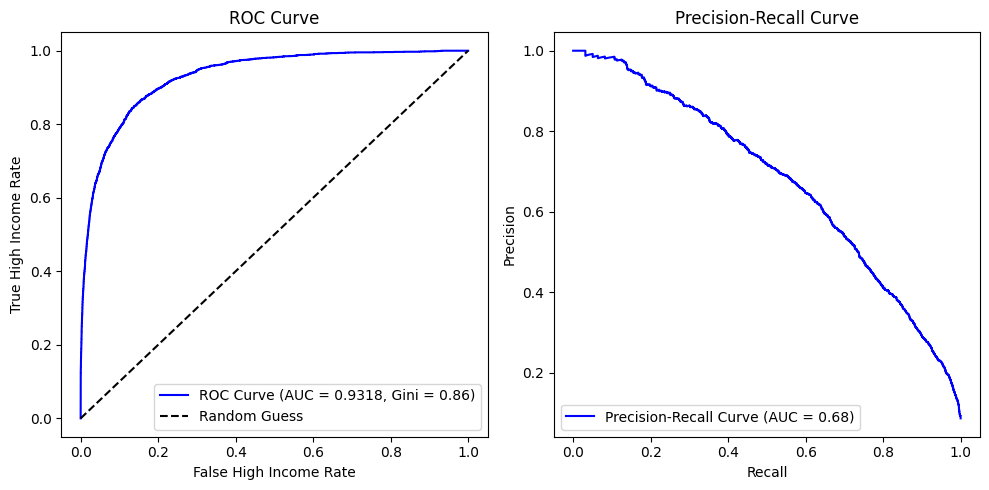

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
def roc_auc_and_pr_auc(y_test, y_pred_proba):
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)

    return roc_auc, pr_auc

def plot_roc_and_pr(y_test, y_pred_proba):
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    gini_coefficient = 2 * roc_auc - 1
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Precision-Recall Curve and AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # ROC Curve
    axes[0].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f}, Gini = {gini_coefficient:.2f})', color='blue')
    axes[0].plot([0, 1], [0, 1], 'k--', label='Random Guess')
    axes[0].set_xlabel('False High Income Rate')
    axes[0].set_ylabel('True High Income Rate')
    axes[0].set_title('ROC Curve')
    axes[0].legend(loc='lower right')

    # Precision-Recall Curve
    axes[1].plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})', color='blue')
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_title('Precision-Recall Curve')
    axes[1].legend(loc='lower left')

    plt.tight_layout()
    plt.show()
plot_roc_and_pr(y_test, proba)

- The ROC curve demonstrates that the model is effective at distinguishing between the classes. The steep ascent at the beginning looks promising: the model captures many true positives with relatively few false positives at low thresholds.

We can say the model 3 can seperate label 1 and label 0 well based on the Accuracy, ROC AUC and PR-AUC score.

Now consider for marketing strategy we aim to target people whose income label is 1.

When choosing the prediction threshold, we need to balance precision and recall for label 1.

Below, we set the threshold by marking only the top-K predictions (K = 10% and 15%) as label 1, and examine their corresponding precision, recall, and estimated ROI (Return on Investment).


 In practice once the true ratio of True Positive/False Positive cost is known. Then we would have better idea that choosing Top 10% is better or choosing Top 15% is better to define our threshold to get better ROI.

Top 10% targeting:
Predicted positives: 2871 / 28706
Precision(1): 0.5744 | Recall(1): 0.6660 | F1(1): 0.6168

Confusion Matrix:
 [[25008  1222]
 [  827  1649]]


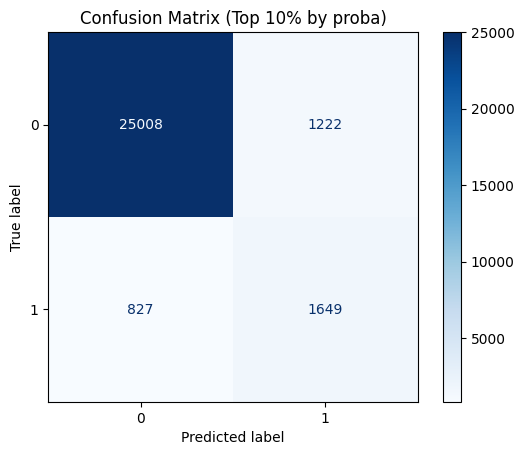

In [43]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



ratio = 0.10
n = len(proba)
k = max(1, int(np.ceil(ratio * n)))             # count the number of top 10%
order = np.argsort(proba)[::-1]                 # order the probability from high to low
topk_idx = order[:k]

# Only top 10 mark as label 1 and else are 0
preds_top10 = np.zeros(n, dtype=int)
preds_top10[topk_idx] = 1

# evaluation
prec = precision_score(y_test, preds_top10, pos_label=1, zero_division=0)
rec  = recall_score(y_test, preds_top10,  pos_label=1)
f1   = f1_score(y_test, preds_top10,      pos_label=1)

print(f"Top {int(ratio*100)}% targeting:")
print(f"Predicted positives: {preds_top10.sum()} / {n}")
print(f"Precision(1): {prec:.4f} | Recall(1): {rec:.4f} | F1(1): {f1:.4f}")

cm = confusion_matrix(y_test, preds_top10, labels=[0,1])
print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap="Blues", values_format='d')
plt.title(f"Confusion Matrix (Top {int(ratio*100)}% by proba)")
plt.show()


Top 15% targeting:
Predicted positives: 4306 / 28706
Precision(1): 0.4452 | Recall(1): 0.7742 | F1(1): 0.5653

Confusion Matrix:
 [[23841  2389]
 [  559  1917]]


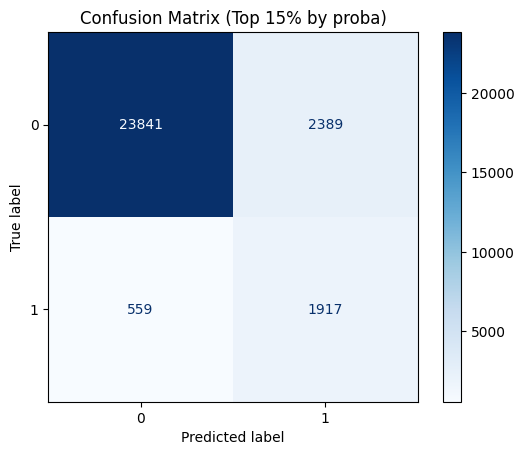

In [44]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



ratio = 0.15
n = len(proba)
k = max(1, int(np.ceil(ratio * n)))
order = np.argsort(proba)[::-1]
topk_idx = order[:k]

# Only top 15 mark as label 1 else label 0
preds_top15 = np.zeros(n, dtype=int)
preds_top15[topk_idx] = 1


prec = precision_score(y_test, preds_top15, pos_label=1, zero_division=0)
rec  = recall_score(y_test, preds_top15,  pos_label=1)
f1   = f1_score(y_test, preds_top15,      pos_label=1)

print(f"Top {int(ratio*100)}% targeting:")
print(f"Predicted positives: {preds_top15.sum()} / {n}")
print(f"Precision(1): {prec:.4f} | Recall(1): {rec:.4f} | F1(1): {f1:.4f}")

cm = confusion_matrix(y_test, preds_top15, labels=[0,1])
print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap="Blues", values_format='d')
plt.title(f"Confusion Matrix (Top {int(ratio*100)}% by proba)")
plt.show()


We will now create a model with just the numerical categories so that we can do a SHAP analysis on those variables.

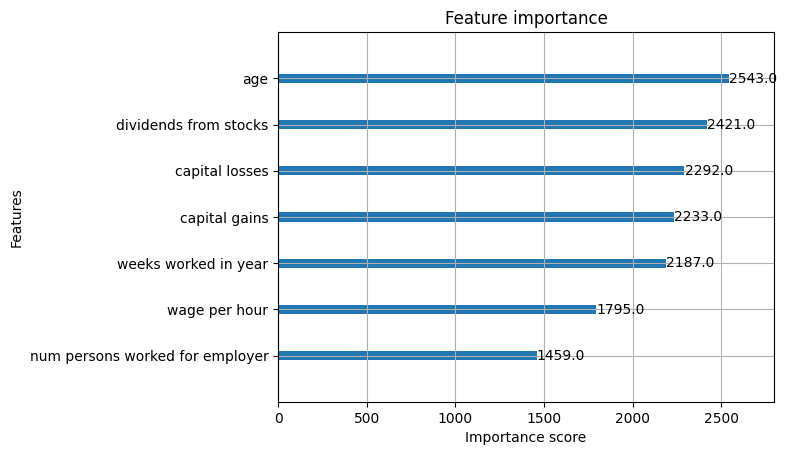

<Figure size 1600x1200 with 0 Axes>

Accuracy: 0.9238138368285376
ROC AUC : 0.8821132124976211
PR-AUC: 0.7354993139380832
F1-score: 0.5171119452417752

Confusion matrix:
 [[25348   882]
 [ 1305  1171]]

Classification report:
               precision    recall  f1-score   support

           0     0.9510    0.9664    0.9586     26230
           1     0.5704    0.4729    0.5171      2476

    accuracy                         0.9238     28706
   macro avg     0.7607    0.7197    0.7379     28706
weighted avg     0.9182    0.9238    0.9206     28706



/tmp/ipython-input-3493035381.py:50: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_sample)


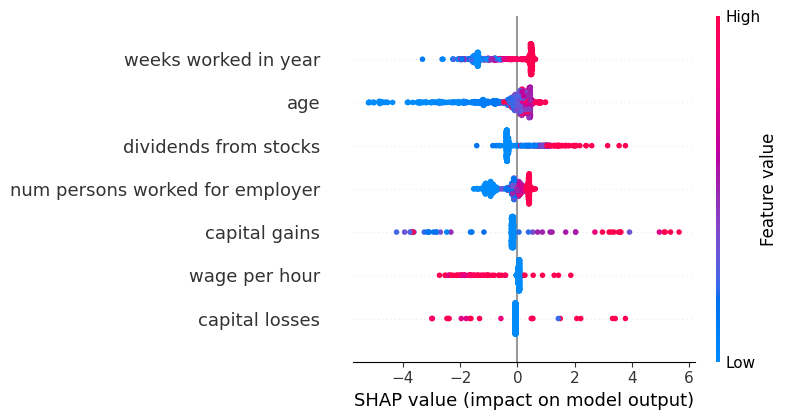

In [45]:
import shap


from xgboost import cv
import xgboost as xgb

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(df2[numericKeys2], df2['Income'], df2['weight'] ,test_size=.2, stratify=df2['Income'])

dmatrix = xgb.DMatrix(data=X_train, label=y_train, weight = w_train, enable_categorical=True)

ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 7, 'alpha':10, "scale_pos_weight": ratio, 'eval_metric':"aucpr"}

#running k-fold validation
xgb_cv = cv(dtrain=dmatrix, params=params, nfold=7, num_boost_round=3000, early_stopping_rounds=200, metrics="aucpr", as_pandas=True, seed=123312)
# create model instance

xgb_cv.head()

#pick the best round via k-fold
best_rounds = len(xgb_cv)

v4Model = xgb.train(params=params, dtrain=dmatrix, num_boost_round=best_rounds)

import matplotlib.pyplot as plt  # for plotting facilities
xgb.plot_importance(v4Model)
plt.figure(figsize = (16, 12))
plt.show()


# Convert X_test to DMatrix
dtest = xgb.DMatrix(data=X_test, enable_categorical=True)

proba = v4Model.predict(dtest)
thr = 0.8
preds = (proba > thr).astype(int)
print("Accuracy:", accuracy_score(y_test, preds))
print("ROC AUC :", roc_auc_score(y_test, proba))
print("PR-AUC:", roc_auc_score(y_test, proba, max_fpr=0.1))
print("F1-score:", f1_score(y_test, preds))
print("\nConfusion matrix:\n", confusion_matrix(y_test, preds))
print("\nClassification report:\n", classification_report(y_test, preds, digits=4))

explainer = shap.TreeExplainer(v4Model)
# sample 1000 to save computation time
X_test_sample = X_test.sample(n=1000, random_state=412)

shap_values = explainer.shap_values(X_test_sample)
shap.summary_plot(shap_values, X_test_sample)

## Problem 2:

In [35]:
from google.colab import files
uploaded = files.upload()  # pick your ZIP file
zip_name = list(uploaded.keys())[0]

# Unzip into a folder called 'extracted'
!unzip -o "$zip_name" -d extracted

# See what's inside
!ls -R extracted

Saving TakeHomeProject_new.zip to TakeHomeProject_new (1).zip
Archive:  TakeHomeProject_new (1).zip
  inflating: extracted/census-bureau.columns  
  inflating: extracted/census-bureau.data  
  inflating: extracted/MLProject_new.pdf  
extracted:
census-bureau.columns  census-bureau.data  MLProject_new.pdf


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

path = "extracted/census-bureau.data"
df = pd.read_csv(path, sep=None, engine="python")  # auto-detects delimiter
print(df.shape)

(199522, 42)


In [38]:
cols = pd.read_csv("extracted/census-bureau.columns", header=None)
df.columns = cols[0].tolist()
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [39]:
df.replace('?', 'UNKNOWN', inplace = True)
df['hispanic origin'].fillna('UNKNOWN', inplace=True)

/tmp/ipython-input-3363673966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hispanic origin'].fillna('UNKNOWN', inplace=True)


In [40]:
missing_value_counts = df.isnull().sum()
print(missing_value_counts)

age                                           0
class of worker                               0
detailed industry recode                      0
detailed occupation recode                    0
education                                     0
wage per hour                                 0
enroll in edu inst last wk                    0
marital stat                                  0
major industry code                           0
major occupation code                         0
race                                          0
hispanic origin                               0
sex                                           0
member of a labor union                       0
reason for unemployment                       0
full or part time employment stat             0
capital gains                                 0
capital losses                                0
dividends from stocks                         0
tax filer stat                                0
region of previous residence            

In [41]:
conditions = [
    (df['label'] == '- 50000.'),
    (df['label'] == '50000+.')
]

values = [0, 1]
df['Income'] = np.select(conditions, values)

# **column engineering**

We are going to focus converting age, education, occupation, marital status, type of industry, type of house hold, and mobility to numerical data as our previous model from problem 1 showed that these categories have high importance scores with regards to determining income. In order to convert these to numerical data we will have to assign some numerical order. We base our orderings on the hierarchy we found during data exploration.

In [56]:
import pandas as pd
import numpy as np

def engineer_features(df):
  #Education map
    map_edu = {
        'Children': 'Children',
        'Less than 1st grade': 'Pre-HS', '1st 2nd 3rd or 4th grade': 'Pre-HS',
        '5th or 6th grade': 'Pre-HS', '7th and 8th grade': 'Pre-HS',
        '9th grade': 'Pre-HS', '10th grade': 'Pre-HS',
        '11th grade': 'HighSchool', '12th grade no diploma': 'HighSchool',
        'High school graduate': 'HighSchool',
        'Some college but no degree': 'CollegeSome',
        'Associates degree-academic program': 'CollegeSome',
        'Associates degree-occup /vocational': 'CollegeSome',
        'Bachelors degree(BA AB BS)': 'Bachelors',
        'Masters degree(MA MS MEng MEd MSW MBA)': 'Graduate',
        'Prof school degree (MD DDS DVM LLB JD)': 'professional Higher Graduate',
        'Doctorate degree(PhD EdD)': 'Higher Graduate'
    }

    # Direct number assignment for education
    education_number_map = {
        'Children': 1,
        'Pre-HS': 2,
        'HighSchool': 3,
        'CollegeSome': 4,
        'Bachelors': 5,
        'Graduate': 6,
        'Higher Graduate': 7,
        'professional Higher Graduate': 8
    }
    df['education_group'] = df['education'].map(map_edu)
    df['education_score'] = df['education_group'].map(education_number_map).fillna(1)

    # Occupation map assignments
    occupation_number_map = {
        'Private household services': 1,
        'Farming forestry and fishing': 2,
        'Other service': 0,
        'Handlers equip cleaners etc': 1,
        'Machine operators assmblrs & inspctrs': 2,
        'Transportation and material moving': 2,
        'Precision production craft & repair': 2,
        'Administrative support': 2,
        'Sales': 3,
        'Technicians and related support': 3,
        'Protective service': 4,
        'Armed Forces': 4,
        'Professional specialty': 4,
        'Executive admin and managerial': 4,
        'Not in universe': 0
    }
    df['occupation_score'] = df['detailed occupation recode'].map(occupation_number_map).fillna(1)

    #Industry number assignements
    industry_number_map = {
'Construction' : 2, 'Not in universe or children' : 0, 'Entertainment': 2,
 'Finance insurance and real estate' : 4, 'Education' : 2,
 'Business and repair services' : 2, 'Manufacturing-nondurable goods' : 3,
 'Personal services except private HH': 1, 'Manufacturing-durable goods' : 4,
 'Other professional services': 5, 'Mining': 5, 'Transportation': 3, 'Wholesale trade': 4,
 'Public administration': 4, 'Retail trade': 1, 'Social services': 1,
 'Private household services': 0, 'Utilities and sanitary services': 5,
 'Communications': 5, 'Hospital services': 3, 'Medical except hospital': 3,
 'Agriculture': 1, 'Forestry and fisheries': 3, 'Armed Forces': 5
    }
    df['industry_score'] = df['detailed industry recode'].map(industry_number_map).fillna(1)

    #Type of worker numerical assignments
    worker_number_map = {
        'Never worked': 1,
        'Without pay': 1,
        'Not in universe': 1,
        'Private': 2,
        'Local government': 3,
        'State government': 3,
        'Federal government': 4,
        'Self-employed-not incorporated': 4,
        'Self-employed-incorporated': 5
    }
    df['worker_score'] = df['class of worker'].map(worker_number_map).fillna(1)

    #Martital status assignments
    marital_number_map = {
        'Never married': 1,
        'Divorced': 3,
        'Widowed': 2,
        'Separated': 2,
        'Married-spouse absent': 2,
        'Married-civilian spouse present': 3,
        'Married-AF spouse present': 1,
        'Not in universe': 0
    }
    df['marital_score'] = df['marital stat'].map(marital_number_map).fillna(1)

    #Create a count for the number of kids
    df['kids_count'] = pd.to_numeric(df['family members under 18'], errors='coerce').fillna(0)

    # Create household score
    def get_household_score(row):
        has_kids = row['kids_count'] > 0
        is_married = 'married' in str(row['marital stat']).lower()

        if is_married and has_kids: return 2
        elif is_married and not has_kids: return 3
        elif not is_married and has_kids: return 1
        else: return 4

    df['household_score'] = df.apply(get_household_score, axis=1)

    # Based on data was a correlation with income and mobility
    #thus we add this to potential
    mobility_number_map = {
        'Not in universe': 0,
        'Same state': 1,
        'Different state': 2,
        'Abroad': 2,
        'Not in universe under 1 year': 0
    }
    # Check Columns that correspond to mobility (get this info from problem 1 impotance score)
    mobility_columns = ['state of previous residence', 'migration code-change in msa', 'migration code-change in reg']
    for col in mobility_columns:
        if col in df.columns:
            df['mobility_score'] = df[col].map(mobility_number_map).fillna(0)
            break
    else:
        # If no mobility found, assign 0
        df['mobility_score'] = 0

    financial_columns = ['capital gains', 'dividends from stocks', 'wage per hour']
    for col in financial_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


    # Check what we created
    score_columns = [col for col in df.columns if 'score' in col and 'norm' not in col]
    print(f"Created {len(score_columns)} score columns:")
    for col in score_columns:
        unique_vals = df[col].unique()
        print(f"  {col}: values {sorted(unique_vals)}")

    return df


df = engineer_features(df)


Created 7 score columns:
  education_score: values [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
  occupation_score: values [np.float64(1.0)]
  industry_score: values [np.float64(1.0)]
  worker_score: values [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
  marital_score: values [np.float64(1.0), np.float64(2.0), np.float64(3.0)]
  household_score: values [np.int64(3), np.int64(4)]
  mobility_score: values [np.float64(0.0), np.float64(2.0)]


# Now Normalize the scores.

In [57]:
def normalize_features_simple(df):



    # Normalize score columns (education_score, occupation_score, etc.)
    score_columns = [col for col in df.columns if col.endswith('_score')]

    print(f"Found {len(score_columns)} score columns to normalize:")
    for col in score_columns:
        max_val = df[col].max()
        if max_val > 0:
            df[f'{col}_norm'] = df[col] / max_val
            print(f"  ✅ {col} → {col}_norm (max: {max_val})")
        else:
            df[f'{col}_norm'] = 0
            print(f"  ⚠️  {col} → {col}_norm (all zeros)")

    # Normalize financial columns with log transform
    financial_columns = ['capital gains', 'dividends from stocks', 'wage per hour']
    financial_found = [col for col in financial_columns if col in df.columns]

    print(f"\nFound {len(financial_found)} financial columns to normalize:")
    for col in financial_found:
        # Use log transform for skewed financial data
        max_val = df[col].max()
        if max_val > 0:
            df[f'{col}_norm'] = np.log1p(df[col]) / np.log1p(max_val)
            print(f"  ✅ {col} → {col}_norm (log transform, max: {max_val:,.0f})")
        else:
            df[f'{col}_norm'] = 0
            print(f"  ⚠️  {col} → {col}_norm (all zeros)")



    return df


df = normalize_features_simple(df)


Found 7 score columns to normalize:
  ✅ education_score → education_score_norm (max: 8)
  ✅ occupation_score → occupation_score_norm (max: 1.0)
  ✅ industry_score → industry_score_norm (max: 1.0)
  ✅ worker_score → worker_score_norm (max: 5)
  ✅ marital_score → marital_score_norm (max: 3.0)
  ✅ household_score → household_score_norm (max: 4)
  ✅ mobility_score → mobility_score_norm (max: 2.0)

Found 3 financial columns to normalize:
  ✅ capital gains → capital gains_norm (log transform, max: 99,999)
  ✅ dividends from stocks → dividends from stocks_norm (log transform, max: 99,999)
  ✅ wage per hour → wage per hour_norm (log transform, max: 9,999)


# Now get the two different index.

First the current_income_index and then potential_index


Current Income Index created with weights（based on importance score）:
   - Occupation: 30%
   - Industry: 25%
   - Capital Gains: 15%
   - Dividends: 15%
   - Worker Class: 8%
   - Marital Status: 5%
   - Wage per hour: 2%

In [ ]:
def create_current_income_index(df):

    # Verify we have all the normalized columns we need
    required_columns = [
        'occupation_score_norm',
        'industry_score_norm',
        'capital gains_norm',
        'dividends from stocks_norm',
        'worker_score_norm',
        'marital_score_norm',
        'wage per hour_norm'
    ]

    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        print(f"Missing columns: {missing_columns}")
        print("Available normalized columns:")
        available_norm = [col for col in df.columns if 'norm' in col]
        for col in available_norm:
            print(f"  - {col}")

    # Create Current Income Index with your ML-informed weights
    df['current_income_index'] = (
        df.get('occupation_score_norm', 0) * 0.30 +
        df.get('industry_score_norm', 0) * 0.25 +
        df.get('capital gains_norm', 0) * 0.15 +
        df.get('dividends from stocks_norm', 0) * 0.15 +
        df.get('worker_score_norm', 0) * 0.08 +
        df.get('marital_score_norm', 0) * 0.05 +
        df.get('wage per hour_norm', 0) * 0.02
    )



    print(f" Current Income Index range: [{df['current_income_index'].min():.3f}-{df['current_income_index'].max():.3f}]")

    return df


df = create_current_income_index(df)


 Current Income Index range: [0.583-0.976]


We now create a function to assign future potential.

Future Potential Index created with weights:
   - Education (age-adjusted): 35%
   - Age Potential: 25% (younger = higher)
   - Geographic Mobility: 25% (by importance score)
   - Household Flexibility: 15%

Age-Education Adjustment Examples:

   Age 25, Bachelors: Base Edu 0.62 → Adjusted 0.50 → Potential 0.47

   Age 55, Pre-HS: Base Edu 0.25 → Adjusted 0.05 → Potential 0.22

   Age 25, Pre-HS: Base Edu 0.25 → Adjusted 0.20 → Potential 0.36
   
   Age 55, Bachelors: Base Edu 0.62 → Adjusted 0.25 → Potential 0.30

In [59]:

def create_future_potential_index(df):

    # Age adjustment for education
    #Younge people are more likely to continue education
    def calculate_age_adjusted_education(row):
        """
        Handle cases like 58-year-olds with 10th grade education
        Younger people get full education potential, older people get reduced
        """
        base_education = row.get('education_score_norm', 0)
        age = row.get('age', 0)

        # Age adjustment factors, these are being somewhat arbitrarily assigned
        # Given more time we could perhaps use the data or more domain knowledge to study how education distributions change with age
        # This might give us a more accurate picture.
        if age < 25:    age_factor = 1.0
        elif age < 35:  age_factor = 0.8
        elif age < 45:  age_factor = 0.6
        elif age < 55:  age_factor = 0.4
        else:           age_factor = 0.2

        return base_education * age_factor

    # Apply age adjusted education
    df['education_age_adjusted'] = df.apply(calculate_age_adjusted_education, axis=1)

    # Age potential we should also account for potential for growth with age alone
    #Being younger leaves more room for career mobility, raises, etc
    #Again given more time we could try to gain domain knowledge to make these weight assignments more precise
    #or use data exploration to numerically come up with an assignment that makes sense.
    if 'age' in df.columns:
        max_age = df['age'].max()
        df['age_potential'] = 1 - (df['age'] / max_age)
    else:
        df['age_potential'] = 0.5  # Default if age missing

    # Verify we have the normalized columns we need
    required_potential_columns = [
        'education_age_adjusted',     # Age-adjusted education
        'age_potential',              # Youth advantage
        'mobility_score_norm',        # Your surprise #8 feature
        'household_score_norm'        # Your #11 feature
    ]

    # Create Future Potential Index
    df['future_potential_index'] = (
        df['education_age_adjusted'] * 0.35 +    # Age-adjusted education
        df['age_potential'] * 0.25 +             # Youth advantage
        df.get('mobility_score_norm', 0) * 0.25 + # Your surprise #8 feature (438 importance)
        df.get('household_score_norm', 0) * 0.15  # Your #11 feature (297 importance)
    )



    print(f"Future Potential Index range: [{df['future_potential_index'].min():.3f}-{df['future_potential_index'].max():.3f}]")

    # Show age-education adjustment in action

    sample_cases = [
        (25, 'Bachelors'),      # Young graduate
        (55, 'Pre-HS'),         # Older, low education
        (25, 'Pre-HS'),         # Young, low education (high potential to improve)
        (55, 'Bachelors')       # Older graduate
    ]

    for age, edu_level in sample_cases:
        # Find similar cases in data
        similar = df[(df['age'] >= age-2) & (df['age'] <= age+2) &
                    (df['education_group'] == edu_level)]
        if len(similar) > 0:
            sample = similar.iloc[0]
            base_edu = sample.get('education_score_norm', 0)
            adjusted_edu = sample.get('education_age_adjusted', 0)
            potential = sample.get('future_potential_index', 0)

    return df


df = create_future_potential_index(df)

Future Potential Index range: [0.130-0.815]


# K-means cluster to find natural segments in 2D index space

In [60]:
def apply_kmeans_clustering(df, n_clusters=4):

    # two features for K-means (two indices)
    X = df[['current_income_index', 'future_potential_index']].values


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

    # Analyze what each cluster represents
    cluster_analysis = df.groupby('kmeans_cluster').agg({
        'current_income_index': 'mean',
        'future_potential_index': 'mean',
        'weight': 'count'
    }).round(3)

    print("K-means Cluster Analysis:")
    print(cluster_analysis.sort_values('current_income_index', ascending=False))

    return df, kmeans, scaler

df, kmeans_model, scaler = apply_kmeans_clustering(df)


K-means Cluster Analysis:
                current_income_index  future_potential_index  weight
kmeans_cluster                                                      
2                              0.742                   0.300   17661
0                              0.642                   0.383   52399
3                              0.624                   0.233   46191
1                              0.589                   0.406   83271


# Assign the marketing lable
Convert K-means clusters to business segments

In [61]:
def assign_marketing_segments(df):

    # Analyze cluster centers to understand what each cluster represents
    cluster_means = df.groupby('kmeans_cluster').agg({
        'current_income_index': 'mean',
        'future_potential_index': 'mean'
    })

    # Map clusters to segments based on their characteristics
    cluster_to_segment = {}
    for cluster_id in cluster_means.index:
        income = cluster_means.loc[cluster_id, 'current_income_index']
        potential = cluster_means.loc[cluster_id, 'future_potential_index']

        # Business logic for naming
        if income > cluster_means['current_income_index'].median():
            if potential > cluster_means['future_potential_index'].median():
                cluster_to_segment[cluster_id] = 'High-Income High-Potential'
            else:
                cluster_to_segment[cluster_id] = 'High-Income Low-Potential'
        else:
            if potential > cluster_means['future_potential_index'].median():
                cluster_to_segment[cluster_id] = 'Low-Income High-Potential'
            else:
                cluster_to_segment[cluster_id] = 'Low-Income Low-Potential'

    df['marketing_segment'] = df['kmeans_cluster'].map(cluster_to_segment)

    print("Cluster to Segment Mapping:")
    for cluster, segment in cluster_to_segment.items():
        count = (df['kmeans_cluster'] == cluster).sum()
        print(f"Cluster {cluster} → {segment} ({count} people)")

    return df, cluster_to_segment

df, segment_mapping = assign_marketing_segments(df)


Cluster to Segment Mapping:
Cluster 0 → High-Income High-Potential (52399 people)
Cluster 1 → Low-Income High-Potential (83271 people)
Cluster 2 → High-Income Low-Potential (17661 people)
Cluster 3 → Low-Income Low-Potential (46191 people)


Create comprehensive visualizations

/tmp/ipython-input-1540452999.py:47: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


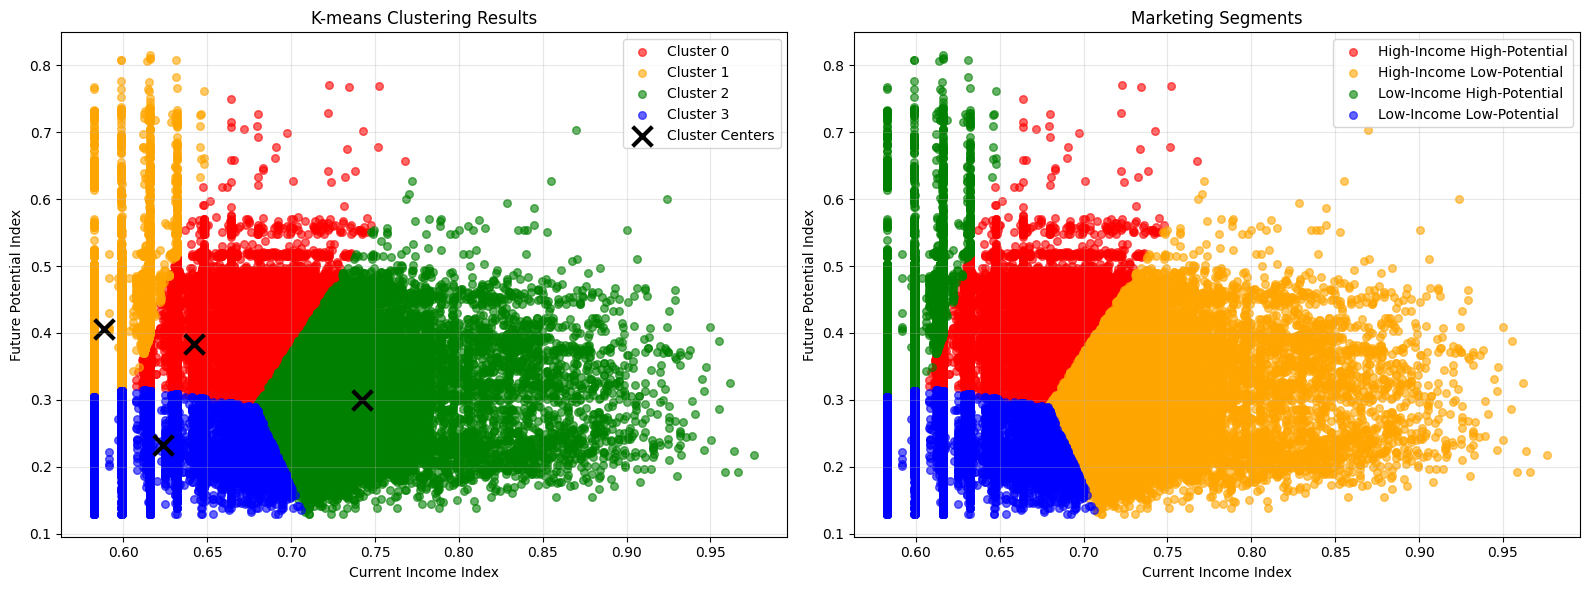

In [ ]:
def visualize_segments(df):


    plt.style.use('default')
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: K-means clusters with centers
    colors = ['red', 'orange', 'green', 'blue']
    for i, color in enumerate(colors):
        cluster_data = df[df['kmeans_cluster'] == i]
        axes[0].scatter(cluster_data['current_income_index'],
                       cluster_data['future_potential_index'],
                       c=color, label=f'Cluster {i}', alpha=0.6, s=30)

    # Add cluster centers
    centers = kmeans_model.cluster_centers_
    centers_original = scaler.inverse_transform(centers)
    axes[0].scatter(centers_original[:, 0], centers_original[:, 1], c='black', marker='x', s=200, linewidth=3, label='Cluster Centers')

    axes[0].set_xlabel('Current Income Index')
    axes[0].set_ylabel('Future Potential Index')
    axes[0].set_title('K-means Clustering Results')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Plot 2: Marketing segments
    segment_colors = {
        'High-Income High-Potential': 'red',
        'High-Income Low-Potential': 'orange',
        'Low-Income High-Potential': 'green',
        'Low-Income Low-Potential': 'blue'
    }

    for segment, color in segment_colors.items():
        segment_data = df[df['marketing_segment'] == segment]
        axes[1].scatter(segment_data['current_income_index'], segment_data['future_potential_index'], c=color, label=segment, alpha=0.6, s=30)

    axes[1].set_xlabel('Current Income Index')
    axes[1].set_ylabel('Future Potential Index')
    axes[1].set_title('Marketing Segments')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return fig

# Create visualizations
chart = visualize_segments(df)


Evaluation of the K-means Segmentation

Silhouette Score: measures cluster cohesion vs separation.

Davies–Bouldin Index: measures average cluster similarity.


Calinski–Harabasz Index: measures between-cluster variance vs within-cluster variance.


In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X2 = df[['current_income_index','future_potential_index']].to_numpy()
km = KMeans(n_clusters=4, n_init=50, random_state=0)
labels = km.fit_predict(X2)

print("Silhouette:", silhouette_score(X2, labels))           # higher is better
print("Davies–Bouldin:", davies_bouldin_score(X2, labels))   # lower is better
print("Calinski–Harabasz:", calinski_harabasz_score(X2, labels)) # higher is better


Silhouette: 0.46101315594827347
Davies–Bouldin: 0.8594643536279498
Calinski–Harabasz: 212158.37492959242
